<a href="https://colab.research.google.com/github/SeoJiWon1/ML-DL/blob/main/Pytorch_%EB%AF%B8%EB%8B%88_%EB%B0%B0%EC%B9%98%EC%99%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A1%9C%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 배치와 데이터 로드(Mini Batch and Data Load)

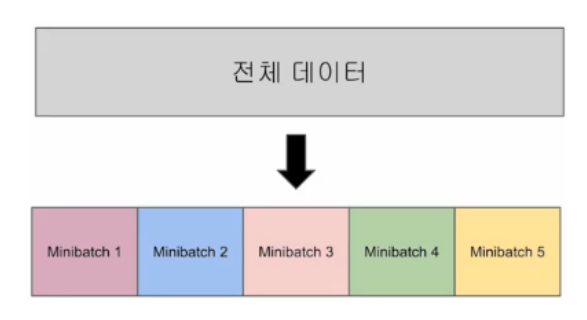

위의 그림은 전체 데이터를 미니 배치 단위로 나누는 것을 보여준다.

 미니 배치 학습을 하게되면 미니 배치만큼만 가져가서 미니 배치에 대한 대한 비용(cost)를 계산하고, 경사 하강법을 수행

다음 미니 배치를 가져가서 경사 하강법을 수행하고 마지막 미니 배치까지 이를 반복 이렇게 전체 데이터에 대한 학습이 1회 끝나면 1 에포크(Epoch)가 끝

에포크(Epoch)는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말한다

미니 배치 학습에서는 미니 배치의 개수만큼 경사 하강법을 수행해야 전체 데이터가 한 번 전부 사용되어 1 에포크(Epoch)

미니 배치의 개수는 결국 미니 배치의 크기를 몇으로 하느냐에 따라서 달라지는데 미니 배치의 크기를 배치 크기(batch size)

# 이터레이션(Iteration)

에포크와 배치 크기와 이터레이션의 관계

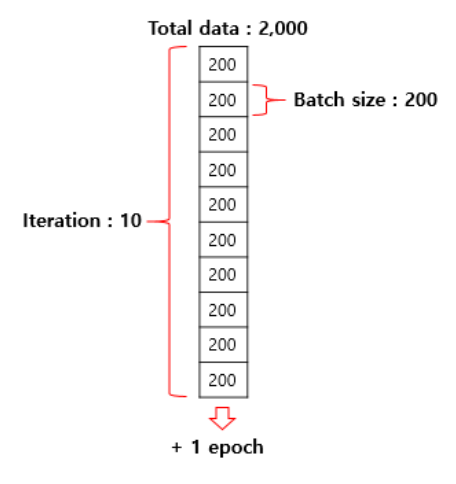

# 데이터 로드하기(Data Load)
파이토치에서는 데이터를 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 데이터셋(Dataset)과 데이터로더(DataLoader)를 제공

이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행

기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것

Dataset을 커스텀하여 만들 수도 있지만 여기서는 텐서를 입력받아 Dataset의 형태로 변환해주는 TensorDataset을 사용


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

TensorDataset과 DataLoader를 임포트

In [ ]:
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

데이터 정의

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

TensorDataset의 입력으로 사용하고 dataset으로 저장

In [ ]:
dataset = TensorDataset(x_train, y_train)

파이토치의 데이터셋을 만들었다면 데이터로더를 사용 가능합니다. 데이터로더는 기본적으로 2개의 인자를 입력받는다. 

하나는 데이터셋, 미니 배치의 크기 이때 미니 배치의 크기는 통상적으로 2의 배수를 사용
(ex) 64, 128, 256...) 

그리고 추가적으로 많이 사용되는 인자로 shuffle shuffle=True를 선택하면 Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꾼다

In [ ]:
dataloader = DataLoader(dataset, batch_size =2, shuffle = True)

모델과 옵티마이저 설계

In [ ]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    # print(batch_idx)
    # print(samples)
    x_train, y_train = samples
    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.mse_loss(prediction, y_train)

    # cost로 H(x) 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 36127.132812
Epoch    0/20 Batch 2/3 Cost: 18412.839844
Epoch    0/20 Batch 3/3 Cost: 2694.463867
Epoch    1/20 Batch 1/3 Cost: 1321.882080
Epoch    1/20 Batch 2/3 Cost: 452.617432
Epoch    1/20 Batch 3/3 Cost: 149.357895
Epoch    2/20 Batch 1/3 Cost: 39.494362
Epoch    2/20 Batch 2/3 Cost: 11.970226
Epoch    2/20 Batch 3/3 Cost: 7.366069
Epoch    3/20 Batch 1/3 Cost: 0.647476
Epoch    3/20 Batch 2/3 Cost: 1.539885
Epoch    3/20 Batch 3/3 Cost: 1.907826
Epoch    4/20 Batch 1/3 Cost: 0.483556
Epoch    4/20 Batch 2/3 Cost: 0.525060
Epoch    4/20 Batch 3/3 Cost: 3.591793
Epoch    5/20 Batch 1/3 Cost: 1.614474
Epoch    5/20 Batch 2/3 Cost: 0.234709
Epoch    5/20 Batch 3/3 Cost: 1.935875
Epoch    6/20 Batch 1/3 Cost: 0.489629
Epoch    6/20 Batch 2/3 Cost: 0.524963
Epoch    6/20 Batch 3/3 Cost: 3.575213
Epoch    7/20 Batch 1/3 Cost: 1.345983
Epoch    7/20 Batch 2/3 Cost: 0.840455
Epoch    7/20 Batch 3/3 Cost: 2.297073
Epoch    8/20 Batch 1/3 Cost: 1.373909
Epoch